## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [8]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
%matplotlib inline

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [17]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
""

### Find dimensions of an image in the dataset

> Indented block



In [18]:
print('x_train shape:', x_train.shape) # dimension is 28 * 28 


x_train shape: (60000, 28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [21]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [42]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [44]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Import the necessary layers from keras to build the model

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [36]:
# Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1))) # 32 batch size, 3 number of filters and 3 kernal is filter size
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128)) # 1 layer created with 128 neurons
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 21s 349us/step - loss: 0.3757 - acc: 0.8653 - val_loss: 0.2895 - val_acc: 0.8951
Epoch 2/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.2318 - acc: 0.9142 - val_loss: 0.2649 - val_acc: 0.9034
Epoch 3/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.1713 - acc: 0.9362 - val_loss: 0.2411 - val_acc: 0.9138
Epoch 4/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1207 - acc: 0.9559 - val_loss: 0.2558 - val_acc: 0.9171
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.0803 - acc: 0.9704 - val_loss: 0.2754 - val_acc: 0.9178
Epoch 6/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0547 - acc: 0.9798 - val_loss: 0.3300 - val_acc: 0.9182
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [47]:
 # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.5))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.4812 - acc: 0.8264 - val_loss: 0.3234 - val_acc: 0.8826
Epoch 2/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.3304 - acc: 0.8814 - val_loss: 0.2851 - val_acc: 0.8944
Epoch 3/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.2845 - acc: 0.8966 - val_loss: 0.2544 - val_acc: 0.9070
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.2558 - acc: 0.9079 - val_loss: 0.2389 - val_acc: 0.9123
Epoch 5/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.2395 - acc: 0.9122 - val_loss: 0.2403 - val_acc: 0.9159
Epoch 6/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.2214 - acc: 0.9186 - val_loss: 0.2409 - val_acc: 0.9174
Epoch 7/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.2110 - acc: 0.9212 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

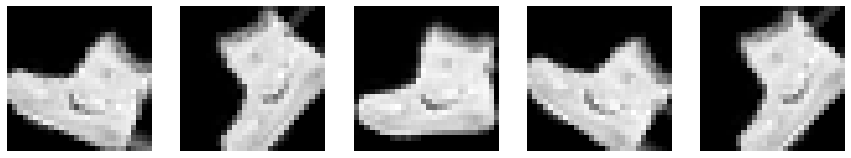

In [49]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [50]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   9/1875 [..............................] - ETA: 28s - loss: 2.3668 - acc: 0.4583

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 29s 16ms/step - loss: 0.6491 - acc: 0.7639 - val_loss: 0.3131 - val_acc: 0.8990
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4933 - acc: 0.8215 - val_loss: 0.2921 - val_acc: 0.8963
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4529 - acc: 0.8366 - val_loss: 0.2864 - val_acc: 0.8973
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4308 - acc: 0.8445 - val_loss: 0.2884 - val_acc: 0.9041
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4089 - acc: 0.8509 - val_loss: 0.2859 - val_acc: 0.8982
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3994 - acc: 0.8536 - val_loss: 0.2942 - val_acc: 0.9014
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3868 - acc: 0.8600 - val_loss: 0.2990 - val_acc: 0.8987
Epoch 8/10
1875/1875 [==============================] - 29s

###  Report the final train and validation accuracy

In [51]:
loss_and_metrics = model3.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 69us/step
[0.20880168848534425, 0.9231]


In [52]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 78us/step
[0.281871307861805, 0.9028]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10


### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()

In [84]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator


[]

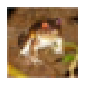

In [92]:
plt.subplot(1,10,i)
plt.axis("off")
plt.imshow(x_train[0].squeeze().astype('uint8'), cmap='gray')
plt.plot()

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

---



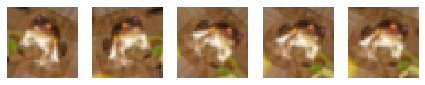

In [93]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()